## Метод опорных векторов

In [ ]:
from sklearn import datasets
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2,
                                    n_redundant=0, n_classes=2, random_state=1)
X, y = datasets.make_blobs(centers=2, cluster_std=2.5, random_state=12)

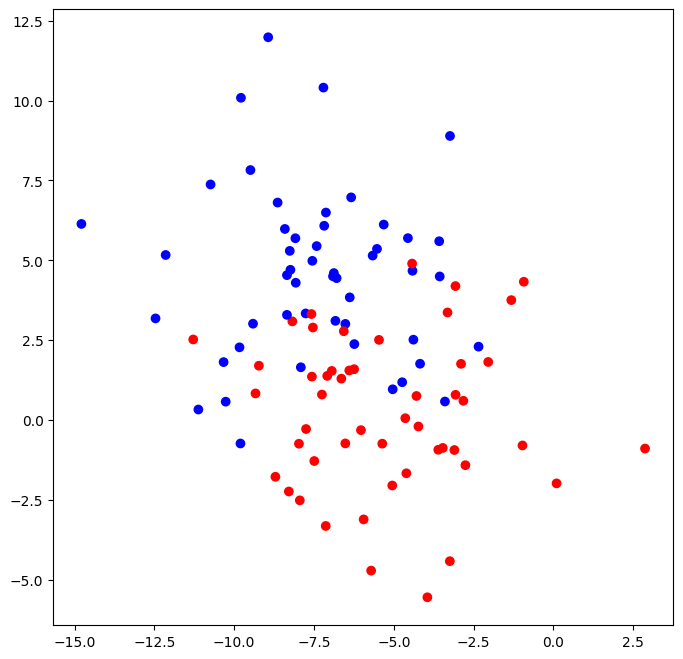

In [ ]:
# и изобразим их на графике
colors = ListedColormap(['blue', 'red'])

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors);

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (80, 2)
Размер массива признаков тестовой выборки (20, 2)
Размер массива ответов для обучающей выборки (80,)
Размер массива ответов для тестовой выборки (20,)


Обучение SVC

[Kernels](https://scikit-learn.org/stable/modules/svm.html#svm-kernels)

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear').fit(X_train, y_train)
svc.score(X_train, y_train), svc.score(X_test, y_test)

(0.8625, 0.7)

[Визуализация](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py) логистической регрессии

In [ ]:
Z

array([0, 0, 0, ..., 1, 1, 1])

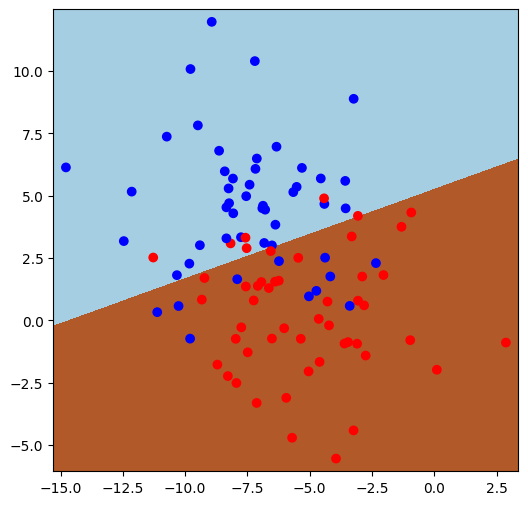

In [ ]:
import numpy as np

plt.figure(figsize=(6, 6))

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors);

Линейное ядро

In [ ]:
svc = SVC(kernel='linear').fit(X_train, y_train)
svc.score(X_train, y_train), svc.score(X_test, y_test)

(0.8625, 0.7)

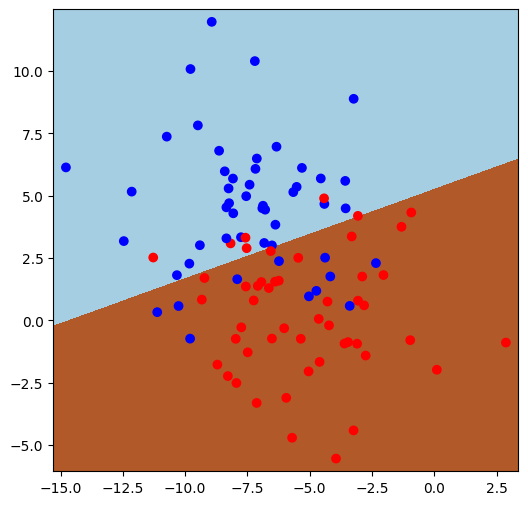

In [ ]:
plt.figure(figsize=(6, 6))

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors);

Полиномиальное ядро

In [ ]:
svc = SVC(kernel='rbf').fit(X_train, y_train)
svc.score(X_train, y_train), svc.score(X_test, y_test)

(0.85, 0.7)

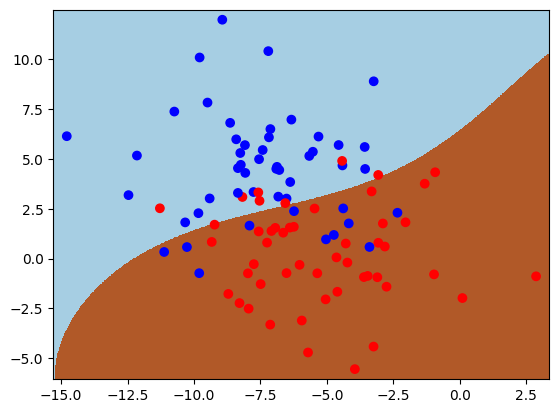

In [ ]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors);

### ROC-кривая

In [ ]:
pred_proba = svc.predict_proba(X_test)

AttributeError: predict_proba is not available when probability=False

In [ ]:
svc = SVC(kernel='poly',
          degree=2,
          probability=True).fit(X_train, y_train)
svc.score(X_train, y_train), svc.score(X_test, y_test)

(0.875, 0.7)

In [ ]:
pred_proba = svc.predict_proba(X_test)
pred_proba

array([[0.68648223, 0.31351777],
       [0.11624986, 0.88375014],
       [0.14935837, 0.85064163],
       [0.13178195, 0.86821805],
       [0.89142967, 0.10857033],
       [0.41725783, 0.58274217],
       [0.73486101, 0.26513899],
       [0.53313934, 0.46686066],
       [0.70805396, 0.29194604],
       [0.32900094, 0.67099906],
       [0.17422905, 0.82577095],
       [0.31125824, 0.68874176],
       [0.96660772, 0.03339228],
       [0.17913263, 0.82086737],
       [0.29141182, 0.70858818],
       [0.5750529 , 0.4249471 ],
       [0.2731828 , 0.7268172 ],
       [0.10593603, 0.89406397],
       [0.96510922, 0.03489078],
       [0.66668217, 0.33331783]])

In [ ]:
from sklearn.metrics import roc_curve

pred_proba = svc.predict_proba(X_test)
# получаем значения FRP, TPR для различных значений порога
fpr, tpr, thres = roc_curve(y_test, pred_proba[:, 1])

In [ ]:
# classes = np.where(pred_proba[:, 1] >= best_th, 1, 0)
# classes

In [ ]:
# svc.predict(X_test)

In [ ]:
for line in zip(fpr[:10], tpr[:10], thres[:10]):
    print(line)

(0.0, 0.0, inf)
(0.0, 0.1111111111111111, 0.8940639746676445)
(0.0, 0.4444444444444444, 0.8506416293059998)
(0.09090909090909091, 0.4444444444444444, 0.8257709457005322)
(0.09090909090909091, 0.5555555555555556, 0.8208673657218256)
(0.2727272727272727, 0.5555555555555556, 0.708588180950839)
(0.2727272727272727, 0.7777777777777778, 0.6709990625649512)
(0.6363636363636364, 0.7777777777777778, 0.333317833524578)
(0.6363636363636364, 0.8888888888888888, 0.31351777330135017)
(0.7272727272727273, 0.8888888888888888, 0.29194604341717556)


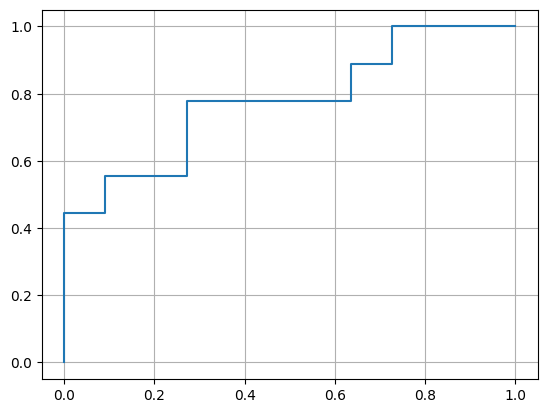

In [ ]:
plt.plot(fpr, tpr)
plt.grid()

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
pred_proba2 = lr.predict_proba(X_test)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.8375, 0.7)

In [ ]:
fpr2, tpr2, thres2 = roc_curve(y_test, pred_proba2[:, 1])

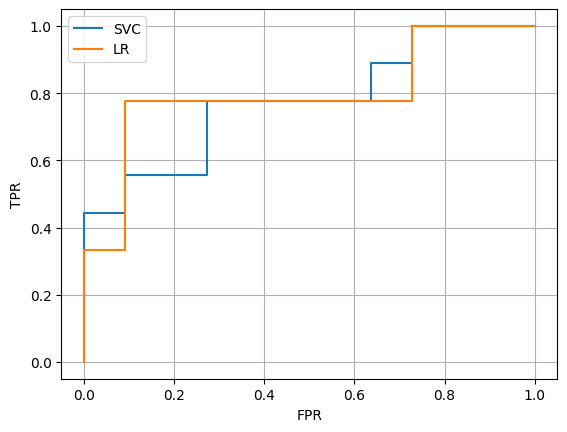

In [ ]:
plt.plot(fpr, tpr, label='SVC' )
plt.plot(fpr2, tpr2, label='LR')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend(loc=0)
plt.grid()
plt.show()

#### ROC-AUC

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred_proba[:, 1])

0.7777777777777777

In [ ]:
roc_auc_score(y_test, pred_proba2[:, 1])

0.797979797979798

In [ ]:
from sklearn.metrics import auc

In [ ]:
fpr

array([0.        , 0.        , 0.        , 0.09090909, 0.09090909,
       0.27272727, 0.27272727, 0.63636364, 0.63636364, 0.72727273,
       0.72727273, 1.        ])

In [ ]:
tpr

array([0.        , 0.11111111, 0.44444444, 0.44444444, 0.55555556,
       0.55555556, 0.77777778, 0.77777778, 0.88888889, 0.88888889,
       1.        , 1.        ])

In [ ]:
auc(fpr, tpr)

0.7777777777777777

In [ ]:
auc(fpr2, tpr2)

0.797979797979798

#### Вручную

In [ ]:
def confusion_matrix(y_prob, y, threshold):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    for predicted_pord, actual in zip(y_prob, y):
        if predicted_pord >= threshold:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1

    return tp, fp, fn, tn

In [ ]:
# пример
# y_prob = [0.5, 0.4, 0.2, 0.3, 0.4, 0.5]
# y = [1, 1, 0, 0, 0, 0]

# confusion_matrix(y_prob, y, 0.4)

(2, 2, 0, 2)

In [ ]:
my_fpr = []
my_tpr = []

for thresh in np.arange(0, 1.01, 0.01):
    tp, fp, fn, tn = confusion_matrix(pred_proba2[:, 1], y_test, thresh)
    fpr_i = fp / (fp + tn)
    tpr_i = tp / (tp + fn)
    my_fpr.append(fpr_i)
    my_tpr.append(tpr_i)

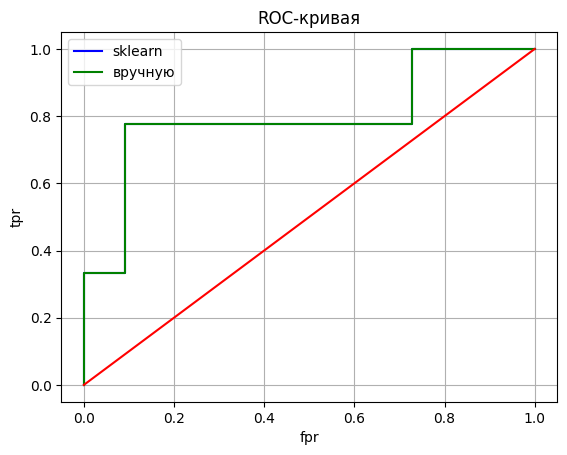

In [ ]:
plt.plot(fpr2, tpr2, 'b', label='sklearn')
plt.plot(my_fpr, my_tpr, 'g', label='вручную')
plt.plot([0, 1],[0, 1], 'r')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.title('ROC-кривая')
plt.grid()

### PR-кривая

In [ ]:
from sklearn.metrics import precision_recall_curve

prs, recs, thres = precision_recall_curve(y_test, pred_proba2[:, 1])

In [ ]:
prs[-1], recs[-1]

(1.0, 0.0)

In [ ]:
prs.shape, recs.shape, thres.shape

((21,), (21,), (20,))

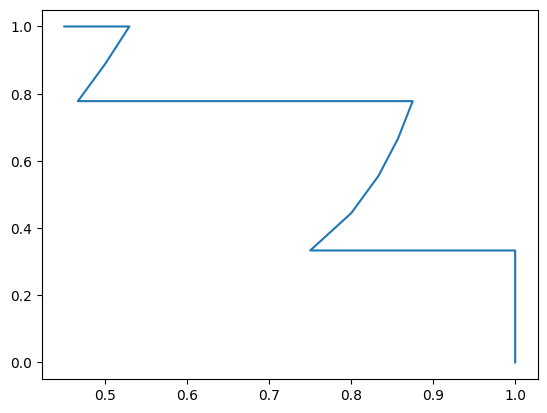

In [ ]:
plt.plot(prs, recs)

In [ ]:
best_f1 = 0
best_th = -1

for i in range(len(prs)):
    f1 = 2 * prs[i] * recs[i] / (prs[i] + recs[i])
    if f1 >= best_f1:
        best_f1 = f1
        best_th = thres[i]

best_f1, best_th

(0.823529411764706, 0.6524799613784578)

## Многоклассовая классификация

Поработаем с данными о продажах и оценках видеоигр с [Kaggle Datasets](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings).

In [ ]:
!wget https://drive.google.com/uc?id=1GjWxnBDtloQ_qXE8eawLYhWEpve5aeXL -O videogames.csv

--2024-09-18 16:32:22--  https://drive.google.com/uc?id=1GjWxnBDtloQ_qXE8eawLYhWEpve5aeXL
Resolving drive.google.com (drive.google.com)... 74.125.132.138, 74.125.132.101, 74.125.132.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.132.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1GjWxnBDtloQ_qXE8eawLYhWEpve5aeXL [following]
--2024-09-18 16:32:22--  https://drive.usercontent.google.com/download?id=1GjWxnBDtloQ_qXE8eawLYhWEpve5aeXL
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.181.132, 2607:f8b0:4001:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.181.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1618040 (1.5M) [application/octet-stream]
Saving to: ‘videogames.csv’

videogames.csv      100%[===================>]   1.54M  --.-KB/s    in 0.01s   

2024-09-18 16:32:25 (141 MB/s) 

In [ ]:
import pandas as pd

df = pd.read_csv('videogames.csv')
print(df.shape)

(16719, 16)


### Перевод в классификацию

In [ ]:
# пропуски
df = df.dropna(subset='User_Score')
# строки
df = df[~(df['User_Score'] == 'tbd')]
df['User_Score'] = df['User_Score'].astype('float')

df['User_Score_cls'] = pd.cut(df['User_Score'], bins=[0, 6, 8, 10], labels=['low', 'med', 'high'])

df = df.drop(columns=['Name', 'Publisher', 'Developer'])

df.head()

<ipython-input-101-8a90ee377c72>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['User_Score'] = df['User_Score'].astype('float')
<ipython-input-101-8a90ee377c72>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['User_Score_cls'] = pd.cut(df['User_Score'], bins=[0, 6, 8, 10], labels=['low', 'med', 'high'])


,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,User_Score_cls
0,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,E,med
2,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,E,high
3,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,E,med
6,DS,2006.0,Platform,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,E,high
7,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,E,med


### Предобработка

In [ ]:
from sklearn.model_selection import train_test_split


df = df.dropna()

target = 'User_Score_cls'

X = df.drop(columns=[target, 'User_Score'])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.head()

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,Rating
12359,PSP,2008.0,Role-Playing,0.06,0.00,0.00,0.00,0.06,78.0,20.0,30.0,T
11888,PS2,2007.0,Strategy,0.00,0.00,0.07,0.00,0.07,69.0,10.0,8.0,E10+
123,DS,2005.0,Misc,1.66,2.75,1.60,0.62,6.62,74.0,45.0,27.0,E
2837,X360,2007.0,Sports,0.67,0.00,0.00,0.06,0.72,79.0,31.0,34.0,E
5824,XB,2003.0,Racing,0.23,0.07,0.00,0.01,0.30,76.0,41.0,30.0,E


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


cat_cols = X_train.select_dtypes('object').columns
num_cols = X_train.select_dtypes(exclude='object').columns


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse=False), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

X_train_pipe = preprocessor.fit_transform(X_train)
X_test_pipe = preprocessor.transform(X_test)

X_train_pipe.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(5460, 45)

### 🧠 Упражнение: подбор параметров модели SVC через кросс-валидацию

Переберите параметры:

1. kernel
  - poly
  - rbf

2. И параметр C в диапазоне от 0.1 до 10 (штук 5)

Считайте метрику ROC AUC с OvO по кросс-валидации на 5 фолдах.

Выберите самую лучшую модель.

#### 🧠 Упражнение: подбор параметров модели SVC через кросс-валидацию (ответ)


In [ ]:
from sklearn.model_selection import cross_val_score
from tqdm import tqdm


models = {}
stats = pd.DataFrame(columns=['model', 'metric'])

C = [0.1, 0.5, 1, 5, 10]
for kernel in ['poly', 'rbf']:
    for c in tqdm(C):
        svc = SVC(kernel=kernel, C=c, probability=True)

        metric = cross_val_score(
            svc, X_train_pipe, y_train,
            cv=5, scoring='roc_auc_ovo'
        ).mean()

        models[kernel] = svc
        new_stata = pd.DataFrame({
            'model': [f'{kernel}, {c}'],
            'metric': [metric]
        })
        stats = pd.concat([stats, new_stata], ignore_index=False)

stats

  0%|          | 0/5 [00:00<?, ?it/s]<ipython-input-78-2de59ab710a3>:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats = pd.concat([stats, new_stata], ignore_index=False)
100%|██████████| 5/5 [02:57<00:00, 35.59s/it]


,model,metric
0,"poly, 0.1",0.761729
0,"poly, 0.5",0.788691
0,"poly, 1",0.803623
0,"poly, 5",0.798545
0,"poly, 10",0.780114
0,"rbf, 0.1",0.802203
0,"rbf, 0.5",0.809725
0,"rbf, 1",0.811677
0,"rbf, 5",0.809058
0,"rbf, 10",0.804404


In [ ]:
stats.sort_values('metric')

,model,metric
0,"poly, 0.1",0.761729
0,"poly, 10",0.780114
0,"poly, 0.5",0.788691
0,"poly, 5",0.798545
0,"rbf, 0.1",0.802203
0,"poly, 1",0.803623
0,"rbf, 10",0.804404
0,"rbf, 5",0.809058
0,"rbf, 0.5",0.809725
0,"rbf, 1",0.811677
